<a href="https://colab.research.google.com/github/SUrooba/uk-retail-sales-analysis/blob/main/UK_Sales_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UK Retail Sales Dashboard**
# 📊 UK Retail Sales Dashboard – Data Analyst Portfolio Project

**Goal**: Explore and visualize 9,800 UK retail transactions to uncover business insights.

## Key Analyses:
- Monthly sales trends and regional performance
- Top-selling products and categories
- Time-based trends (weekdays, months)
- Segment breakdown (customer type, region)

**Tools Used**: Python, Pandas, Seaborn, Matplotlib

---

_This project demonstrates skills in data wrangling, EDA, business insight development, and professional reporting using Python._



# Unzipping Dataset and Loading The Dataset

In [ ]:
import zipfile
import os

In [ ]:
zip_path = "/content/archive.zip"
extract_path = "/content/sales_data"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
for root, dirs, files in os.walk(extract_path):
  for file in files:
    print(os.path.join(root, file))

/content/sales_data/train.csv


***Loading the Dataset***

In [ ]:
# Step 2: Load the dataset
import pandas as pd

file_path = "/content/sales_data/train.csv"
df = pd.read_csv(file_path)

# Show basic info
df.info()

# Preview first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## **Cleaning The Dataset**

In [ ]:
# Step 4: Clean & prepare data

# Convert date columns
# Correctly parse UK-style dates (DD/MM/YYYY)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Check missing values
print(df.isnull().sum())

# Fill missing postal codes with 0 (or drop if you prefer)
df['Postal Code'].fillna(0, inplace=True)

# Create new time-based features
df['Month'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year
df['Weekday'] = df['Order Date'].dt.day_name()

# Preview cleaned data
df.head()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


<ipython-input-15-752472133>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Weekday
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11,2017,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11,2017,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06,2017,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10,2016,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10,2016,Tuesday


# **Key Insights and Visuals**



> Total Sales by Region









<ipython-input-21-4114157327>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")


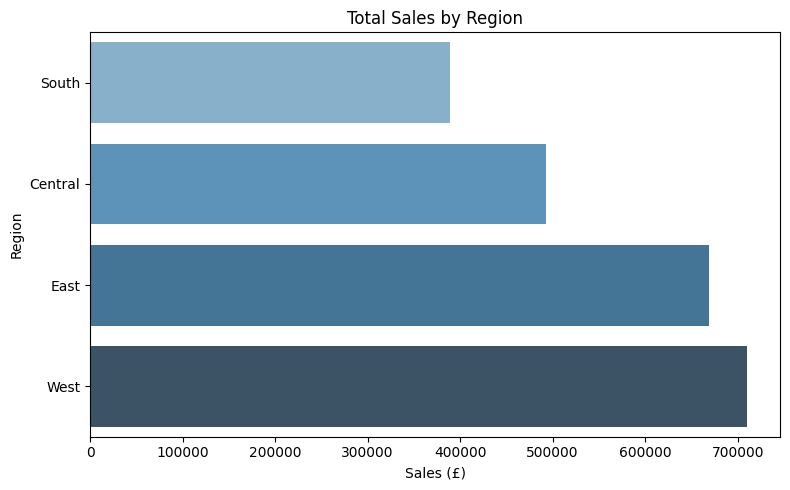

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")
plt.title('Total Sales by Region')
plt.xlabel('Sales (£)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()




> **Top 10 Selling Products**



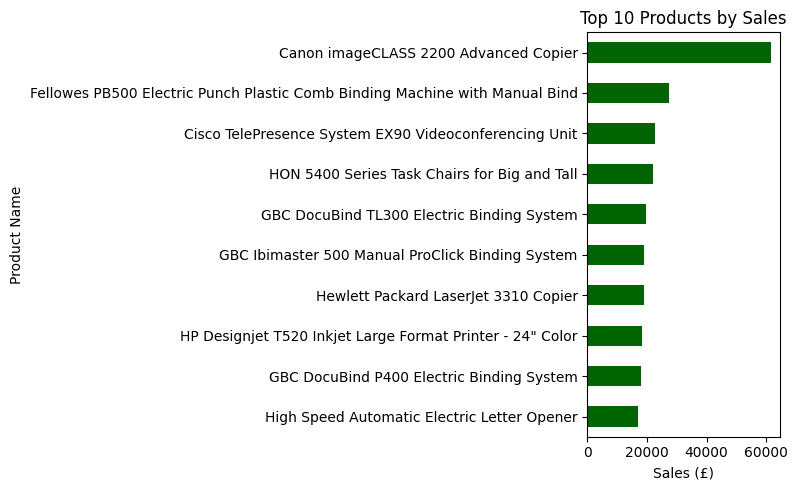

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', color='darkgreen', figsize=(8,5), title='Top 10 Products by Sales')
plt.xlabel('Sales (£)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Sales By Category And Sub Catergory**

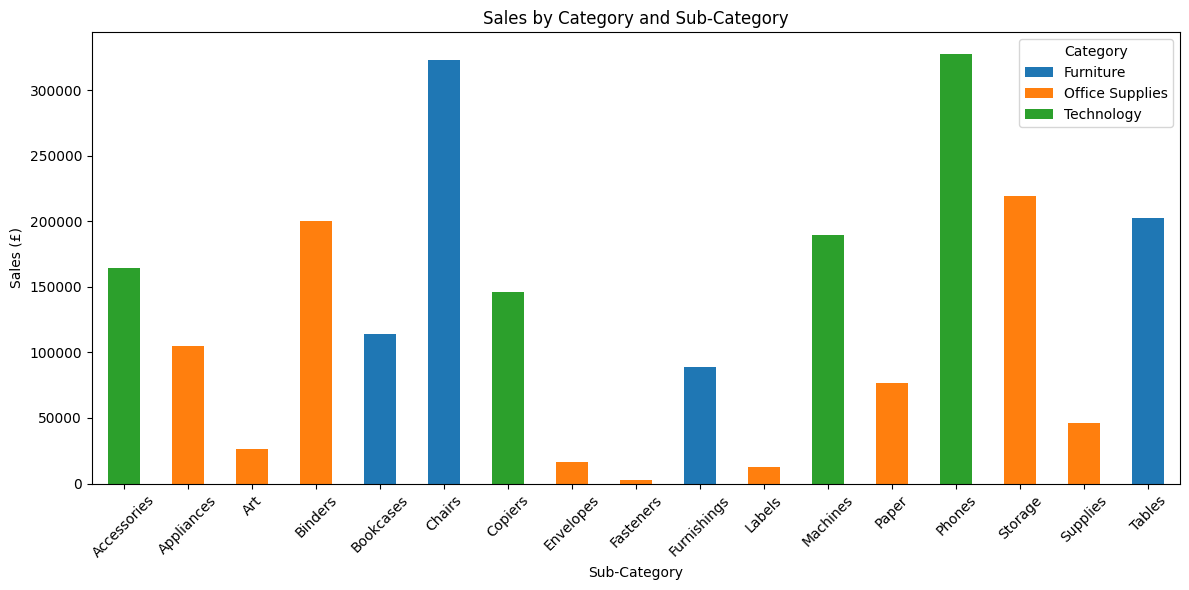

In [ ]:
cat_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack().fillna(0)

cat_sales.T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Sales by Category and Sub-Category")
plt.ylabel("Sales (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Trend Analysis



> **Monthly Sales Trend**



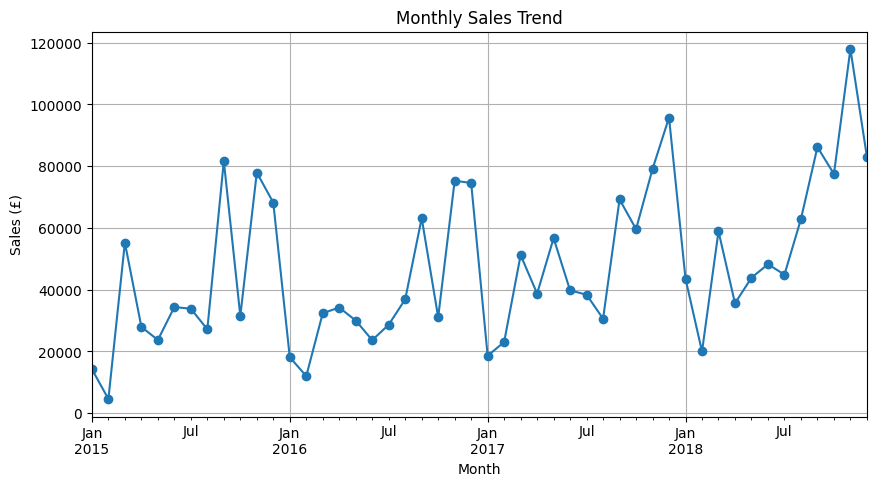

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales (£)')
plt.grid(True)
plt.show()


**Sales Trend By Weekdays**

<ipython-input-16-3105549818>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")


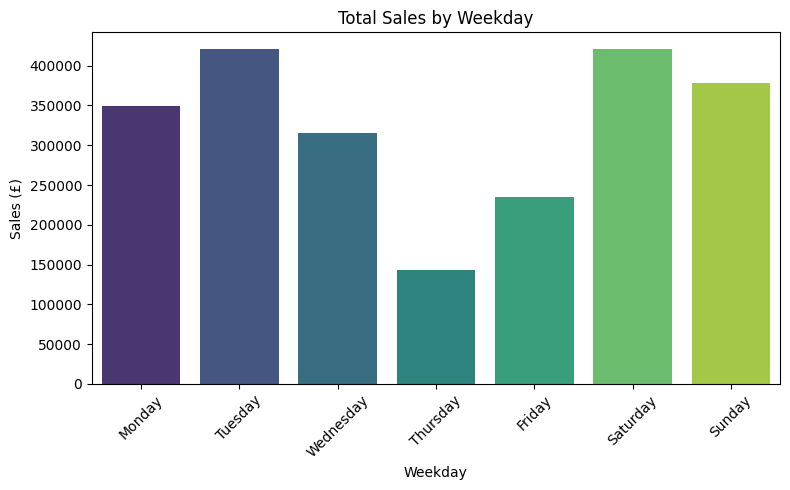

In [ ]:
weekday_sales = df.groupby('Weekday')['Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")
plt.title("Total Sales by Weekday")
plt.ylabel("Sales (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Customer Segment

**Sales By Customer Segment**

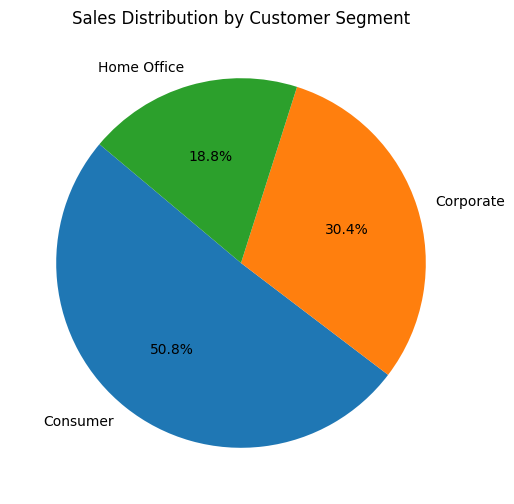

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum()

segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6), title='Sales Distribution by Customer Segment')
plt.ylabel("")
plt.show()


# Summary

In [ ]:
print("Total Sales: £{:,.2f}".format(df['Sales'].sum()))
print("Average Order Value: £{:,.2f}".format(df['Sales'].mean()))
print("Number of Unique Products Sold:", df['Product Name'].nunique())
print("Total Orders:", df['Order ID'].nunique())


Total Sales: £2,261,536.78
Average Order Value: £230.77
Number of Unique Products Sold: 1849
Total Orders: 4922
